In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
mpl.rcParams.update({'font.size': 12, 'font.style': 'normal', 'font.family':'serif'})

## Introduction
NICS (National Instant Criminal Background Check System) is a background check system that was put in place in the United States of America in the 1990s. It is primarily designed to monitor gun sales throughout the country. However, as stated in [the official report by the FBI](https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view), the NICS records "[...] represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold."

In the following visualizations, trends in the number of NICS by year and state will be visualized for the years 2017-2021. The main goal is to gauge the validity of using NICS data to evaluate the (re-)acquisition of firearms in the US. The current hypothesis is that NICS data, as suggested by the FBI notes in the reports, is an unreliable source for studying the purchase of firearms within the US but it could be a useful dataset to gauge state-level sensitivity to civil unrest, resulting in greater interest in (re-)acquiring firearms. The case study of 2020 is selected for this second part of the analysis.

## Data

NICS data selected for this analysis pertains to the last four years (2017-2020). The NICS report goes back to 1998. However, the data recording appears to be most consistent between 1998-2016. Although the data is made officially available in .pdf format by the FBI, BuzzFeed News GitHub profile offers a [csv file parsed from the pdf version](https://github.com/BuzzFeedNews/nics-firearm-background-checks). 2021 will be kept in the overall analysis of the timeseries for purely comparative purposes.

The data will also be normalized by the state population. As the US census happens every ten years (the last one being in 2020), the [data pertaining to 2017-2019](https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html) is simply an estimate. More information about the methods underlying these estimates are found on the [census website](https://www2.census.gov/programs-surveys/popest/technical-documentation/methodology/2010-2019/natstcopr-methv2.pdf). Unfortunately, estimates for 2021 were not yet available at the time of this analysis.

**NB:** The estimates are as of July 1st of the relevant year, whereas the 2020 census data is recorded as of April 1st. Moreover, the data refers to the estimate of the overall population, without differentiating between individuals who are legally of age to acquire a firearm and those who are not.

## Analysis and Visualizations

First, the datasets were loaded and cleaned for use.

In [3]:
pop_estimates = pd.read_csv("pop_estimates.csv", encoding = "utf-8", skiprows = 1)

In [4]:
pop_estimates["Unnamed: 0"] = pop_estimates["Unnamed: 0"].str.replace(".","")

In [5]:
pop_estimates = pop_estimates.drop(columns = ["Census", "Estimates Base", "2010", "2011", "2012", "2013", "2014", "2015", "2016"])

In [6]:
pop_2020 = pd.read_csv("pop_2020.csv", encoding = "utf-8")

In [7]:
pop_estimates = pop_estimates.set_index("Unnamed: 0")

In [8]:
pop_2020 = pop_2020.set_index("AREA")

In [9]:
pop_estimates = pop_estimates.drop(pop_estimates.index[-2])

In [10]:
pop_2020 = pop_2020.rename(index = {'TOTAL RESIDENT POPULATION': 'Total', 'TOTAL RESIDENT POPULATION, INCLUDING PUERTO RICO': 'Puerto Rico total'}, columns = {'RESIDENT POPULATION': '2020'})

In [11]:
pop_2020 = pop_2020.dropna()

In [12]:
pop_2020 = pop_2020.drop(pop_2020.index[-1])

In [13]:
pop_data = pop_2020.join(pop_estimates, on = "AREA", how = "left")

In [14]:
pop_data = pop_data.convert_dtypes()

In [15]:
pop_data["2020"] = pop_data["2020"].str.replace('.', '')
pop_data["2017"] = pop_data["2017"].str.replace(".", "")
pop_data["2018"] = pop_data["2018"].str.replace(".", "")
pop_data["2019"] = pop_data["2019"].str.replace(".", "")

In [16]:
pop_data = pop_data.apply(pd.to_numeric)

In [17]:
background_checks = pd.read_csv("nics-firearm-background-checks.csv", encoding = "utf-8")

In [18]:
background_checks["date"] = pd.to_datetime(background_checks["month"], infer_datetime_format = True)

In [19]:
background_checks["year"] = background_checks["date"].dt.year
background_checks["month"] = background_checks["date"].dt.month

In [20]:
totals_per_year_per_state = background_checks.groupby(["year", "state"]).sum()["totals"].to_frame()
permits_per_year_per_state = background_checks.groupby(["year", "state"]).sum()["permit"].to_frame()
rechecks_per_year_per_state = background_checks.groupby(["year", "state"]).sum()["permit_recheck"].to_frame()

In [21]:
totals_per_year_per_state_2017 = totals_per_year_per_state.loc[[2017]].join(pop_data["2017"], on = 'state', how = 'left').droplevel(level = 0)
totals_per_year_per_state_2018 = totals_per_year_per_state.loc[[2018]].join(pop_data["2018"], on = 'state', how = 'left').droplevel(level = 0)
totals_per_year_per_state_2019 = totals_per_year_per_state.loc[[2019]].join(pop_data["2019"], on = 'state', how = 'left').droplevel(level = 0)
totals_per_year_per_state_2020 = totals_per_year_per_state.loc[[2020]].join(pop_data["2020"], on = 'state', how = 'left').droplevel(level = 0)

In [22]:
permits_per_year_per_state_2017 = permits_per_year_per_state.loc[[2017]].join(pop_data["2017"], on = 'state', how = 'left').droplevel(level = 0)
permits_per_year_per_state_2018 = permits_per_year_per_state.loc[[2018]].join(pop_data["2018"], on = 'state', how = 'left').droplevel(level = 0)
permits_per_year_per_state_2019 = permits_per_year_per_state.loc[[2019]].join(pop_data["2019"], on = 'state', how = 'left').droplevel(level = 0)
permits_per_year_per_state_2020 = permits_per_year_per_state.loc[[2020]].join(pop_data["2020"], on = 'state', how = 'left').droplevel(level = 0)

In [23]:
rechecks_per_year_per_state_2017 = rechecks_per_year_per_state.loc[[2017]].join(pop_data["2017"], on = 'state', how = 'left').droplevel(level = 0)
rechecks_per_year_per_state_2018 = rechecks_per_year_per_state.loc[[2018]].join(pop_data["2018"], on = 'state', how = 'left').droplevel(level = 0)
rechecks_per_year_per_state_2019 = rechecks_per_year_per_state.loc[[2019]].join(pop_data["2019"], on = 'state', how = 'left').droplevel(level = 0)
rechecks_per_year_per_state_2020 = rechecks_per_year_per_state.loc[[2020]].join(pop_data["2020"], on = 'state', how = 'left').droplevel(level = 0)

In [24]:
totals_per_year_per_state_2017["normalized_tot"] = totals_per_year_per_state_2017["totals"]/totals_per_year_per_state_2017["2017"]*100
totals_per_year_per_state_2018["normalized_tot"] = totals_per_year_per_state_2018["totals"]/totals_per_year_per_state_2018["2018"]*100
totals_per_year_per_state_2019["normalized_tot"] = totals_per_year_per_state_2019["totals"]/totals_per_year_per_state_2019["2019"]*100
totals_per_year_per_state_2020["normalized_tot"] = totals_per_year_per_state_2020["totals"]/totals_per_year_per_state_2020["2020"]*100

In [25]:
permits_per_year_per_state_2017["normalized_permits"] = permits_per_year_per_state_2017["permit"]/permits_per_year_per_state_2017["2017"]*100
permits_per_year_per_state_2018["normalized_permits"] = permits_per_year_per_state_2018["permit"]/permits_per_year_per_state_2018["2018"]*100
permits_per_year_per_state_2019["normalized_permits"] = permits_per_year_per_state_2019["permit"]/permits_per_year_per_state_2019["2019"]*100
permits_per_year_per_state_2020["normalized_permits"] = permits_per_year_per_state_2020["permit"]/permits_per_year_per_state_2020["2020"]*100

In [26]:
rechecks_per_year_per_state_2017["normalized_rechecks"] = rechecks_per_year_per_state_2017["permit_recheck"]/rechecks_per_year_per_state_2017["2017"]*100
rechecks_per_year_per_state_2018["normalized_rechecks"] = rechecks_per_year_per_state_2018["permit_recheck"]/rechecks_per_year_per_state_2018["2018"]*100
rechecks_per_year_per_state_2019["normalized_rechecks"] = rechecks_per_year_per_state_2019["permit_recheck"]/rechecks_per_year_per_state_2019["2019"]*100
rechecks_per_year_per_state_2020["normalized_rechecks"] = rechecks_per_year_per_state_2020["permit_recheck"]/rechecks_per_year_per_state_2020["2020"]*100

In [27]:
norm_data_2017 = pd.concat([totals_per_year_per_state_2017["normalized_tot"], 
                          permits_per_year_per_state_2017["normalized_permits"],
                         rechecks_per_year_per_state_2017["normalized_rechecks"]],
                          axis = 1)
norm_data_2018 = pd.concat([totals_per_year_per_state_2018["normalized_tot"], 
                          permits_per_year_per_state_2018["normalized_permits"],
                         rechecks_per_year_per_state_2018["normalized_rechecks"]],
                          axis = 1)
norm_data_2019 = pd.concat([totals_per_year_per_state_2019["normalized_tot"], 
                          permits_per_year_per_state_2019["normalized_permits"],
                         rechecks_per_year_per_state_2019["normalized_rechecks"]],
                          axis = 1)
norm_data_2020 = pd.concat([totals_per_year_per_state_2020["normalized_tot"], 
                          permits_per_year_per_state_2020["normalized_permits"],
                         rechecks_per_year_per_state_2020["normalized_rechecks"]],
                          axis = 1)

In [28]:
norm_data_20172020 = pd.concat([norm_data_2017,
                               norm_data_2018,
                               norm_data_2019,
                               norm_data_2020])

In [29]:
top_10_norm_data_20172020_tot = norm_data_20172020.groupby("state").sum().sort_values(by = "normalized_tot", ascending = False)[:10]
top_10_norm_data_20172020_permit = norm_data_20172020.groupby("state").sum().sort_values(by = "normalized_permits", ascending = False)[:10]
top_10_norm_data_20172020_rechecks = norm_data_20172020.groupby("state").sum().sort_values(by = "normalized_rechecks", ascending = False)[:10]

In [30]:
tot_background_checks_per_year = background_checks["totals"].groupby(background_checks["year"]).sum()

In [31]:
tot_rechecks_per_year = background_checks["permit_recheck"].groupby(background_checks["year"]).sum()

In [32]:
tot_permits_per_year = background_checks["permit"].groupby(background_checks["year"]).sum()

In [33]:
tot_background_checks_per_year = tot_background_checks_per_year[:-1]

In [34]:
tot_rechecks_per_year = tot_rechecks_per_year[:-1]

In [35]:
tot_permits_per_year = tot_permits_per_year[:-1]

In [36]:
background_checks = background_checks[(background_checks["year"] > 2016) & (background_checks["year"] <= 2021)]

In [37]:
totals_per_year_20172020 = background_checks["totals"].groupby(background_checks["year"]).sum()

In [38]:
total_rechecks_per_year_20172020 = background_checks["permit_recheck"].groupby(background_checks["year"]).sum()

In [39]:
total_permits_per_year_20172020 = background_checks["permit"].groupby(background_checks["year"]).sum()

In [40]:
totals_per_state = background_checks["totals"].groupby(background_checks["state"]).sum()

The first visualization created will be a timeseries with the total number of NICS between 1998 and 2021 and focus, in the second plot, on the past five years. 2022 was excluded because only data up to February was available. This will show the general yearly trend of NICS initiated, without differentiating between rechecks and interest in acquisition.

The second visualization created will instead show the timeseries of permit and recheck NICS.

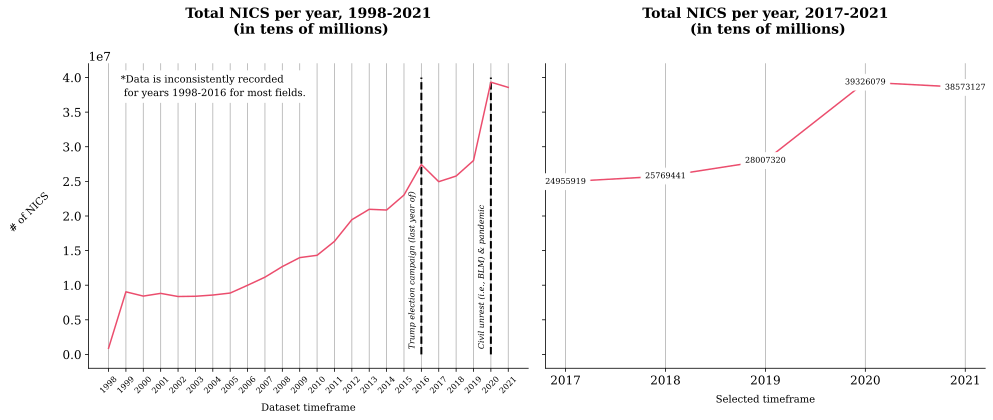

In [41]:
#feedback received: change notation of axis to []x10^6

fig, ax = plt.subplots(1,2, figsize = (14, 6), sharey = True)
years = ["2017", "2018", "2019", "2020", "2021"]
years_1 = ["1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005",
          "2006", "2007", "2008", "2009", "2010", "2011", "2012", 
           "2013", "2014", "2015", "2016", "2017", "2018", "2019",
          "2020", "2021"]
ax[0].plot(years_1, tot_background_checks_per_year.values, c = "#EB4D6D")
ax[0].set_title("Total NICS per year, 1998-2021\n (in tens of millions)", fontsize = 14, weight = 'bold', pad = 30)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].tick_params(axis = 'x', rotation = 45, labelsize = 8)
ax[0].grid(axis = 'x')
ax[0].set_ylabel("# of NICS", fontsize = 10, rotation = 45, labelpad = 30)
ax[0].set_xlabel("Dataset timeframe", fontsize = 10, labelpad = 8)
ax[0].text(0.70, 37000000, "*Data is inconsistently recorded\n for years 1998-2016 for most fields.", fontsize = 10,
        verticalalignment ='bottom', linespacing = 1.5, backgroundcolor = 'white');

for year, value in enumerate(totals_per_year_20172020): #feedback received: no numbers
    ax[1].text(year, value, "{}".format(value), horizontalalignment = "center", verticalalignment = "center", fontsize = 8, backgroundcolor = 'white')
ax[1].set_xlabel("Selected timeframe", fontsize = 10, labelpad = 8)
ax[1].set_title("Total NICS per year, 2017-2021\n (in tens of millions)", fontsize = 14, weight = 'bold', pad = 30)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].grid(axis = 'x')
ax[1].plot(years, totals_per_year_20172020, c = "#EB4D6D")
ax[0].vlines(x = "2016", ymin = 0, ymax = 40000000, color = 'black', lw = 2, ls = "dashed")
ax[0].vlines(x = "2020", ymin = 0, ymax = 40000000, color = 'black', lw = 2, ls = "dashed")
ax[0].text(x = 17.25, y = 1000000, s = "Trump election campaign (last year of)", rotation = 90, fontsize = 8, fontstyle = 'italic')
ax[0].text(x = 21.25, y = 1000000, s = "Civil unrest (i.e., BLM) & pandemic", rotation = 90, fontsize = 8, fontstyle = 'italic')
plt.tight_layout()
plt.savefig("fig_1.png", dpi = 1200);

In [42]:
total_rechecks_per_year = background_checks["permit_recheck"].groupby(background_checks["year"]).sum()

In [43]:
total_permits_per_year = background_checks["permit"].groupby(background_checks["year"]).sum()

In [44]:
total_rechecks_per_state = background_checks["permit_recheck"].groupby(background_checks["state"]).sum()

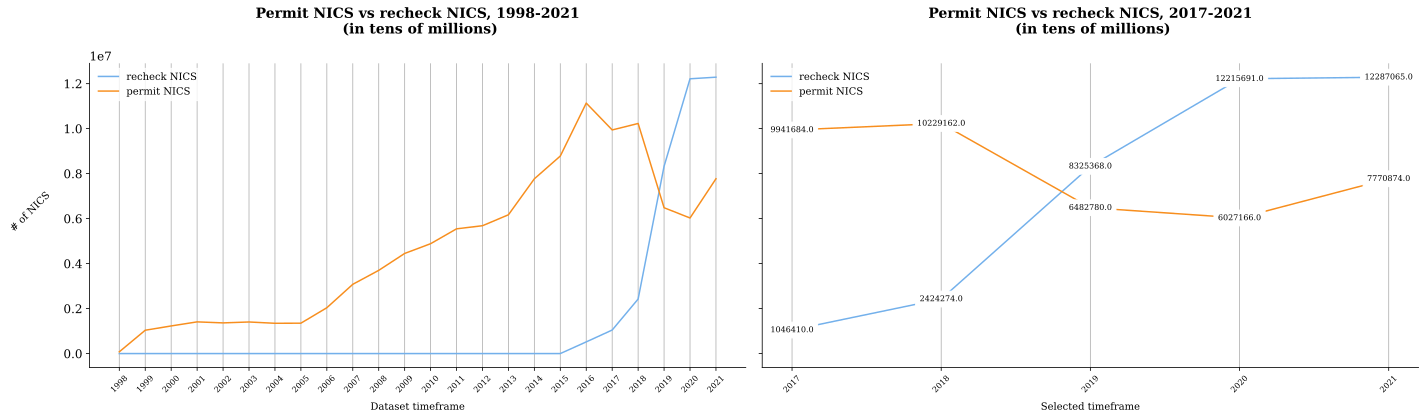

In [45]:
#feedback received: change notation of axis to []x10^7

fig, ax = plt.subplots(1,2, figsize = (20, 6), sharey = True)
years = ["2017", "2018", "2019", "2020", "2021"]
years_1 = ["1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005",
          "2006", "2007", "2008", "2009", "2010", "2011", "2012", 
           "2013", "2014", "2015", "2016", "2017", "2018", "2019",
          "2020", "2021"]

ax[0].plot(years_1, tot_rechecks_per_year, c = "#73B0EB", label = "recheck NICS")
ax[0].plot(years_1, tot_permits_per_year, c = "#F78E1E", label = "permit NICS")
ax[1].plot(years, total_rechecks_per_year_20172020, c = "#73B0EB", label = "recheck NICS")
ax[1].plot(years, total_permits_per_year_20172020, c = "#F78E1E", label = "permit NICS" )

legend = ax[0].legend(fontsize = 10, frameon = True, facecolor = 'white', edgecolor = 'white')
legend.get_frame().set_facecolor('white')
ax[0].set_xlabel("Dataset timeframe", fontsize = 10, labelpad = 8)
ax[0].tick_params(axis = 'x', rotation = 45, labelsize = 8)
ax[0].grid(axis = 'x')
ax[0].set_title("Permit NICS vs recheck NICS, 1998-2021\n (in tens of millions)", fontsize = 14, weight = 'bold', pad = 30)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_ylabel("# of NICS", fontsize = 10, rotation = 45, labelpad = 30)

for year, value in enumerate(total_rechecks_per_year_20172020): #feedback received: no numbers 
    ax[1].text(year, value, "{}".format(value), horizontalalignment = "center", verticalalignment = "center", fontsize = 8, backgroundcolor = 'white')
for year, value in enumerate(total_permits_per_year_20172020): #feedback received: no numbers 
    ax[1].text(year, value, "{}".format(value), horizontalalignment = "center", verticalalignment = "center", fontsize = 8, backgroundcolor = 'white')
legend = ax[1].legend(fontsize = 10, frameon = True, facecolor = 'white', edgecolor = 'white') #feedback received: bigger legend
legend.get_frame().set_facecolor('white')
ax[1].set_xlabel("Selected timeframe", fontsize = 10, labelpad = 8)
ax[1].tick_params(axis = 'x', rotation = 45, labelsize = 8)
ax[1].grid(axis = 'x')
ax[1].set_title("Permit NICS vs recheck NICS, 2017-2021\n (in tens of millions)", fontsize = 14, weight = 'bold', pad = 30)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig("fig_2.png", dpi = 1200);

Since 1998, the number of NICS has, in general, been increasing with occasional peaks (e.g., 2016). If we look at the past five years, as visible from this visualization, the number of NICS in 2020 was significantly higher than in the previous 3 years. This is a [well-known trend](https://fivethirtyeight.com/features/gun-sales-are-surging-but-background-checks-arent-keeping-up/) that has been attributed to the social unrest and the tense political climate in the aftermath of the murder of George Floyd. According to the same article in the hyperlink, such high number of NICS is likely to have caused delays in the approval/ disproval of NICS (delay of more than 3 days results in the automatic approval of the (re-)check). Therefore, for 2020, the proportion of approved permit NICS might be biased by this bureaucratic caveat. Social circumstances and bureaucratic delays should therefore be taken into account when evaluating NICS data for interest in the acquisition of arms.

This given, the second plot clearly highlights that the number of recheck NICS is available only from 2015 onwards. In fact, given the rate and magnitude at which the number of recheck increases, it is most probable that states started to record rechecks gradually, i.e., not all states implemented rechecks in 2015. As the number of rechecks increases more steadily in 2018, the number of permits decreases, probably because the two fields get differentiated.

Let us then identify the top 10 states for number of total NICS, permit NICS and reehceck NICS overall over this period. In order to make the comparison fairer, normalized data will be used.

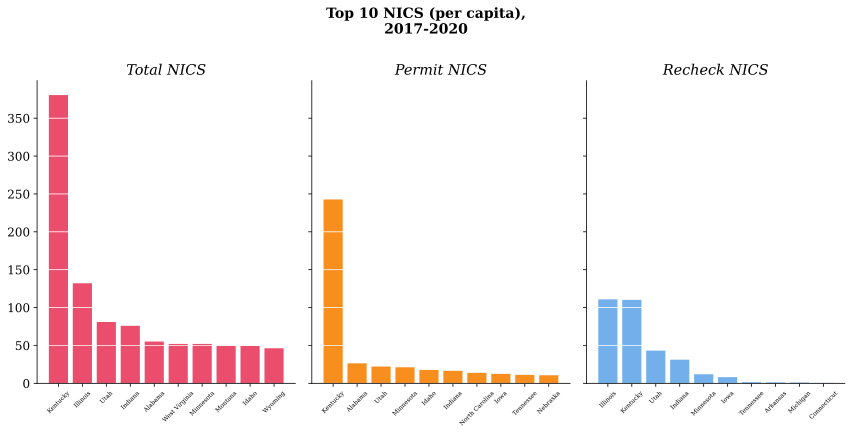

In [46]:
fig, ax = plt.subplots(1, 3, figsize = (12, 6), sharey = True)
ax[0].bar(top_10_norm_data_20172020_tot.index, top_10_norm_data_20172020_tot["normalized_tot"], color = "#EB4D6D")
ax[0].tick_params(axis = 'x', rotation = 45, labelsize = 6)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_title("Total NICS", fontstyle = 'italic')
ax[1].bar(top_10_norm_data_20172020_permit.index, top_10_norm_data_20172020_permit["normalized_permits"], color = "#F78E1E")
ax[1].tick_params(axis = 'x', rotation = 45, labelsize = 6)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_title("Permit NICS", fontstyle = 'italic')
ax[2].bar(top_10_norm_data_20172020_rechecks.index, top_10_norm_data_20172020_rechecks["normalized_rechecks"], color = "#73B0EB")
ax[2].tick_params(axis = 'x', rotation = 45, labelsize = 6)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].set_title("Recheck NICS", fontstyle = 'italic')
fig.suptitle("Top 10 NICS (per capita),\n2017-2020", fontsize = 14, weight = 'bold', y = 1)
ax[0].grid(axis = 'y', color = 'white')
ax[1].grid(axis = 'y', color = 'white')
ax[2].grid(axis = 'y', color = 'white')
plt.tight_layout()
plt.savefig("fig_3.png", dpi = 1200);

Referring to the past 5 years, Kentucky strikes as the state with the highest number of NICS overall and permit NICS, although it also ranks quite high in the number of recheck NICS. Illinois, instead, though has a high number of total NICS per capita, most of them must account for rechecks as it is not found in the permit NICS top 10 ranking. On the contrary, Alabama ranks only for total NICS per capita and permit NICS per capita, probably signifying a low number of recheck NICS per capita.

Let us now look at the top 10 ranking of states with the highest percentages of rechecks over total NICS. 

In [47]:
norm_data_20172020["%_rechecks"] = norm_data_20172020["normalized_rechecks"]/ norm_data_20172020["normalized_tot"]*100
norm_data_2017["%_rechecks"] = norm_data_2017["normalized_rechecks"]/ norm_data_2017["normalized_tot"]*100
norm_data_2018["%_rechecks"] = norm_data_2018["normalized_rechecks"]/ norm_data_2018["normalized_tot"]*100
norm_data_2019["%_rechecks"] = norm_data_2019["normalized_rechecks"]/ norm_data_2019["normalized_tot"]*100
norm_data_2020["%_rechecks"] = norm_data_2019["normalized_rechecks"]/ norm_data_2019["normalized_tot"]*100

In [48]:
highest_percent_rechecks_2017 = norm_data_2017["%_rechecks"].sort_values(ascending = False)[:10]
highest_percent_rechecks_2018 = norm_data_2018["%_rechecks"].sort_values(ascending = False)[:10]
highest_percent_rechecks_2019 = norm_data_2019["%_rechecks"].sort_values(ascending = False)[:10]
highest_percent_rechecks_2020 = norm_data_2020["%_rechecks"].sort_values(ascending = False)[:10]

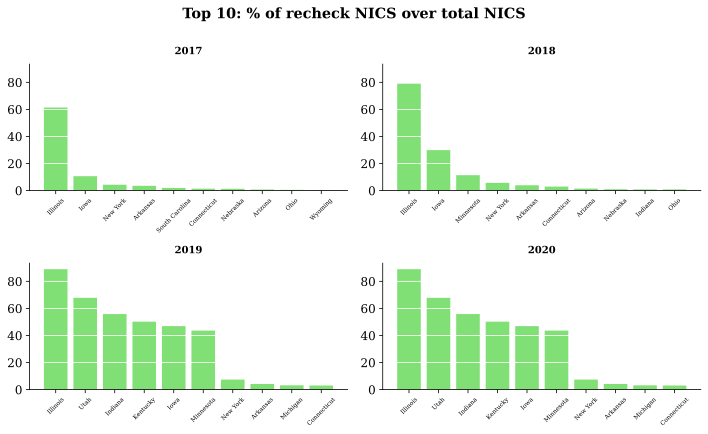

In [49]:
fig = plt.figure(figsize = (10, 6))
gs = mpl.gridspec.GridSpec(2, 2)
ax_0 = fig.add_subplot(gs[0, 0])
ax_0.bar(highest_percent_rechecks_2017.index, highest_percent_rechecks_2017.values, color = "#80DF75")
ax_1 = fig.add_subplot(gs[0, 1], sharey = ax_0)
ax_1.bar(highest_percent_rechecks_2018.index, highest_percent_rechecks_2018.values, color = "#80DF75")
ax_2 = fig.add_subplot(gs[1, 0], sharey = ax_0)
ax_2.bar(highest_percent_rechecks_2019.index, highest_percent_rechecks_2019.values, color = "#80DF75")
ax_3 = fig.add_subplot(gs[1, 1], sharey = ax_0)
ax_3.bar(highest_percent_rechecks_2020.index, highest_percent_rechecks_2020.values, color = "#80DF75")
axs = [ax_0, ax_1, ax_2, ax_3]
fig.suptitle("Top 10: % of recheck NICS over total NICS", weight = 'bold', y = 1)
years = ['2017', "2018", "2019", "2020"]
for ax, year in zip(axs, years):
    ax.tick_params(axis = 'x', rotation = 45, labelsize = 6)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title("{}".format(year), weight = 'bold', fontsize = 10, pad = 10)
    ax.grid(axis = 'y', color = 'white')
plt.tight_layout()
plt.savefig("fig_4.png", dpi = 1200);

It is clear that the states who significantly implemented the recording of rechecks or for which FBI started to record rechecks are Illinois, Iowa, Utah, Kentucky and Indiana. However, the picture offered by this visualization should be considered with caution. 

Let's take a look at the case of Kentucky. A quick look-up in the data confirms that rechecks seem to be recorded only from 2019 onwards (see code below). Nevertheless, rechecks in Kentucky seem to have existed already back in 2015, [as stated in an article by a local news service](https://wfpl.org/kentucky-background-checks-stand-out/). Therefore, although it would be important to discriminate between permit and recheck NICS to understand whether there is a real rise in interest for guns at state-level, the current data does not allow for such comparison.

One last piece of analysis will focus on 2020 on a month-level overall in the USA and then in the specific states. Population estimates are not available on a monthly basis, so the NICS data for different months but related to the same year has been normalized with the yearly population value. 

In [50]:
background_checks_2020_by_month = background_checks[background_checks["year"] == 2020].groupby("month").sum()

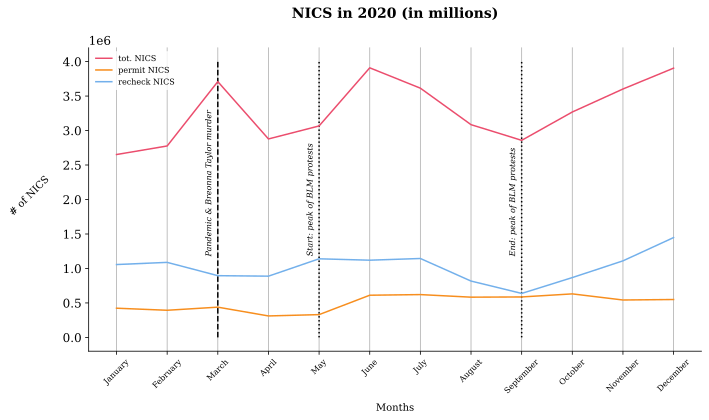

In [51]:
#feedback received: change notation of axis to []x10^6

fig, ax = plt.subplots(1,1, figsize = (10, 6))
months = ["January", "February", "March", "April",
         "May", "June", "July", "August", "September",
         "October", "November", "December"]
ax.plot(months, background_checks_2020_by_month["totals"], label = "tot. NICS", c = "#EB4D6D")
ax.plot(months, background_checks_2020_by_month["permit"], label = "permit NICS", c = "#F78E1E")
ax.plot(months, background_checks_2020_by_month["permit_recheck"], label = "recheck NICS", c = "#73B0EB")
legend = ax.legend(fontsize = 8, frameon = True, facecolor = 'white', edgecolor = 'white', loc = "upper left")
legend.get_frame().set_facecolor('white')
ax.set_xlabel("Months", fontsize = 10, labelpad = 8)
ax.tick_params(axis = 'x', rotation = 45, labelsize = 8)
ax.grid(axis = 'x')
ax.set_title("NICS in 2020 (in millions)", fontsize = 14, weight = 'bold', pad = 30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("# of NICS", fontsize = 10, rotation = 45, labelpad = 30)

ax.vlines(x = "March", ymin = 0, ymax = 4000000, ls = "dashed", color = "black")
ax.vlines(x = "May", ymin = 0, ymax = 4000000, ls = "dotted", color = "black")
ax.vlines(x = "September", ymin = 0, ymax = 4000000, ls = "dotted", color = "black")
ax.text(x = 1.75, y = 1200000, s = "Pandemic & Breonna Taylor murder", rotation = 90, fontsize = 8, fontstyle = 'italic')
ax.text(x = 3.75, y = 1200000, s = "Start: peak of BLM protests", rotation = 90, fontsize = 8, fontstyle = 'italic')
ax.text(x = 7.75, y = 1200000, s = "End: peak of BLM protests", rotation = 90, fontsize = 8, fontstyle = 'italic')
plt.tight_layout()
plt.savefig("fig_5.png", dpi = 1200);

The plot seems to suggest that the trigger that caused an increase in the permit NICS in 2020 was the murder of George Floyd more than the pandemic or the previous murder of Breonna Taylor. Such increase, between May and June, is not justified by a decrease in the number of recheck NICS. 

In [52]:
top_10_norm_tot_2020 = norm_data_2020["normalized_tot"].sort_values(ascending = False)[:10]
top_10_norm_permits_2020 = norm_data_2020["normalized_permits"].sort_values(ascending = False)[:10]
top_10_norm_rechecks_2020 = norm_data_2020["normalized_rechecks"].sort_values(ascending = False)[:10]

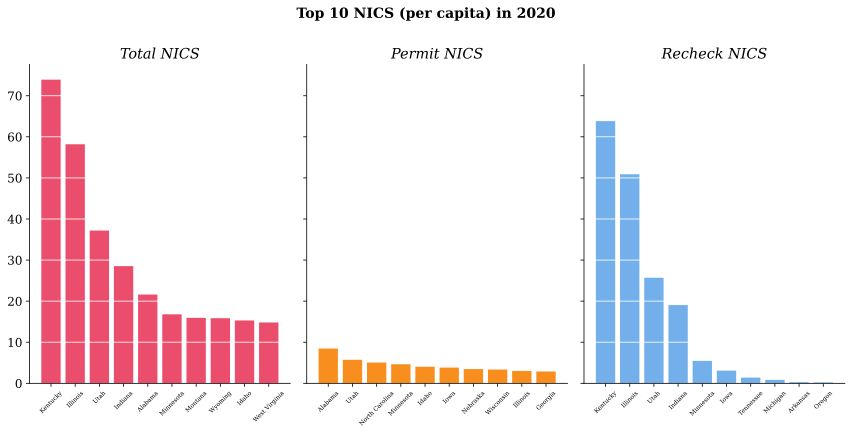

In [53]:
fig, ax = plt.subplots(1, 3, figsize = (12, 6), sharey = True)
ax[0].bar(top_10_norm_tot_2020.index, top_10_norm_tot_2020.values, color = "#EB4D6D")
ax[0].tick_params(axis = 'x', rotation = 45, labelsize = 6)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_title("Total NICS", fontstyle = 'italic')
ax[1].bar(top_10_norm_permits_2020.index, top_10_norm_permits_2020.values, color = "#F78E1E")
ax[1].tick_params(axis = 'x', rotation = 45, labelsize = 6)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_title("Permit NICS", fontstyle = 'italic')
ax[2].bar(top_10_norm_rechecks_2020.index, top_10_norm_rechecks_2020.values, color = "#73B0EB")
ax[2].tick_params(axis = 'x', rotation = 45, labelsize = 6)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].set_title("Recheck NICS", fontstyle = 'italic')
fig.suptitle("Top 10 NICS (per capita) in 2020", fontsize = 14, weight = 'bold', y = 1)
ax[0].grid(axis = 'y', color = 'white')
ax[1].grid(axis = 'y', color = 'white')
ax[2].grid(axis = 'y', color = 'white')
plt.tight_layout()
plt.savefig("fig_6.png", dpi = 1200);

The top 10 rankings for the various categories of NICS display some interesting information, and highlights how some trends already identified in the 5-year period 2017-2020 are also mirrored in 2020. For example, Kentucky and Illinois are clearly high in the total ranking because of their number of rechecks (though Illinois also ranks among the top 10 for permit NICS). Moreover, Alabama leads the way for number of permit NICS in 2020 but does not figure in the recheck ranking. 

In order to asses the impact of civil unrest of May-August 2020 on some specific states. Minnesota is a good place to start, given that George Floyed was murdered in Minneapolis where the first protests happened. Then, let's have a look at Alabama for a comparison as a state that usually seem to have a high number of per capita permit checks and that already in 2020 accounts for rechecks. The scope is to understand if such a high interest in purchasing arms could perhaps be related to a high state sentitivity to social and civil unrest, and whether its magnitude compared to Minnesota, the epicenter of the protests, is the same. Comparison will not be carried out with all the states. 

Fort the purpose of the present analysis, the comparison will only be visual.

In [54]:
background_checks_2020_by_month_MN = background_checks[(background_checks["year"] == 2020) & (background_checks["state"] == "Minnesota")].groupby("month").sum()

In [55]:
background_checks_2020_by_month_AL = background_checks[(background_checks["year"] == 2020) & (background_checks["state"] == "Alabama")].groupby("month").sum()

In [56]:
pop_MN_2020 = pop_data.loc["Minnesota"]["2020"]
pop_AL_2020 = pop_data.loc["Alabama"]["2020"]

In [57]:
norm_MN_tot = background_checks_2020_by_month_MN["totals"]/pop_MN_2020*100
norm_MN_permits = background_checks_2020_by_month_MN["permit"]/pop_MN_2020*100
norm_MN_rechecks = background_checks_2020_by_month_MN["permit_recheck"]/pop_MN_2020*100

norm_AL_tot = background_checks_2020_by_month_AL["totals"]/pop_AL_2020*100
norm_AL_permits = background_checks_2020_by_month_AL["permit"]/pop_AL_2020*100
norm_AL_rechecks = background_checks_2020_by_month_AL["permit_recheck"]/pop_AL_2020*100

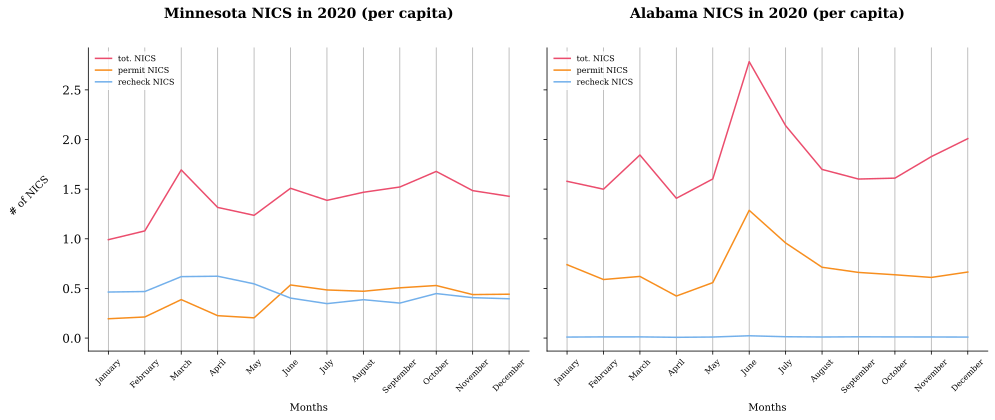

In [58]:
fig, ax = plt.subplots(1,2, figsize = (14, 6), sharey = True)
months = ["January", "February", "March", "April",
         "May", "June", "July", "August", "September",
         "October", "November", "December"]
ax[0].plot(months, norm_MN_tot.values, label = "tot. NICS", c = "#EB4D6D")
ax[0].plot(months, norm_MN_permits.values, label = "permit NICS", c = "#F78E1E")
ax[0].plot(months, norm_MN_rechecks.values, label = "recheck NICS", c = "#73B0EB")
legend = ax[0].legend(fontsize = 8, frameon = True, facecolor = 'white', edgecolor = 'white', loc = "upper left") #feedback received: bigger legend fonts
legend.get_frame().set_facecolor('white')
ax[0].set_xlabel("Months", fontsize = 10, labelpad = 8)
ax[0].tick_params(axis = 'x', rotation = 45, labelsize = 8)
ax[0].grid(axis = 'x')
ax[0].set_title("Minnesota NICS in 2020 (per capita)", fontsize = 14, weight = 'bold', pad = 30)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_ylabel("# of NICS", fontsize = 10, rotation = 45, labelpad = 30)

ax[1].plot(months, norm_AL_tot.values, label = "tot. NICS", c = "#EB4D6D")
ax[1].plot(months, norm_AL_permits.values, label = "permit NICS", c = "#F78E1E")
ax[1].plot(months, norm_AL_rechecks.values, label = "recheck NICS", c = "#73B0EB")
legend = ax[1].legend(fontsize = 8, frameon = True, facecolor = 'white', edgecolor = 'white', loc = "upper left") #feedback received: bigger legend fonts
legend.get_frame().set_facecolor('white')
ax[1].set_xlabel("Months", fontsize = 10, labelpad = 8)
ax[1].tick_params(axis = 'x', rotation = 45, labelsize = 8)
ax[1].grid(axis = 'x')
ax[1].set_title("Alabama NICS in 2020 (per capita)", fontsize = 14, weight = 'bold', pad = 30)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig("fig_7.png", dpi = 1200);

Alabama looks much more sentitive than Minnesota to the social unrest of May 2020. Even when the permit checks decrease, from June to July and August, their values per capita remain above Minnesota's where, instead, the increase of May 2020 stabilizes until about October.

## Conclusions


Despite being the 'best' data on the circulation of firearms in the US, the NICS data presents several limitations and must be contextualized against a number of factors in order to be of use. 

(1) The recording of the data is, at times, inconsistent when it comes to rechecks. For some states it is impossible to establish whether background checks do not entail rechecks or if the NICS numbers reported by the FBI 'hide' under the surface those rechecks. 

(2) Numbers of denial/ acceptance of permits should be assessed against NICS data to interpret situational circumstances. For example, not all permit NICS result in the (re-)acquisition of a firearm. However, if the permit NICS initiated are too many, the bureaucracy slows down and acceptances might increase in proportion. Raw NICS data needs to be evaluated against their outcome data.

(3) Further insights should also be gained by looking at state-specific laws in order to fully grasp the meaning of the numbers of rechecks and NICS represented in the data. [For example, in Texas, so long as an individual possesses a state-issued permit, they can purchase any firearm without a background check initiated through NICS.](https://giffords.org/lawcenter/state-laws/background-check-procedures-in-texas/) This means that the NICS data might not be such a good indicator for the real number of people interested in (re-)acquiring a firearm. 


Resolving these ambiguity goes beyond the scope of this analysis which has ultimately proven that NICS data is not per se a good indicator of the numbers of firearms individuals strive to acquire across the US states, but it is a good indicator of how events might affect US sensitivity towards (re-)acquiring firearms.